In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from scipy import interpolate
from scipy.stats import linregress
from voigt_fit_lib import *

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/Astro/Code/PG1522+101/science.mplstyle')

Bar chart

In [3]:
mh = 1e12
mb = 0.17*mh

In [4]:
mb

170000000000.0

In [5]:
mb/1e11

1.7

In [6]:
stars_lo = 2e10 # Behroozi 18
stars_hi = 3e10 # Kravtsov 18

In [7]:
# Using range of M* in Parkash 18
ism_lo = 7e9 
ism_hi = 9e9

In [8]:
cool_lo = 1e10 # Werk 14 preferred lower limit scaled down by 7, per Faerman and Werk 23
cool_hi = 2e10 # Werk 14 upper limit scaled down by 

In [9]:
warm_lo = 9e9 # Tumlinson 11 scaled to 250 kpc, oxygen mass scaled per Peeples 14
warm_hi = 9e10 # Z=0.1

In [10]:
hot_lo = 3e10
hot_hi = 1e11

In [11]:
0.2*mb/1e10

3.4

Print fractions

In [12]:
stars_lo/mb, stars_hi/mb

(0.11764705882352941, 0.17647058823529413)

In [13]:
ism_lo/mb, ism_hi/mb

(0.041176470588235294, 0.052941176470588235)

In [14]:
cool_lo/mb, cool_hi/mb

(0.058823529411764705, 0.11764705882352941)

In [15]:
warm_lo/mb, warm_hi/mb

(0.052941176470588235, 0.5294117647058824)

In [16]:
hot_lo/mb, hot_hi/mb

(0.17647058823529413, 0.5882352941176471)

In [17]:
(stars_lo+ism_lo+cool_lo+warm_lo+hot_lo)/mb

0.4470588235294118

In [18]:
(stars_hi+ism_hi+cool_hi+warm_hi+hot_hi)/mb

1.464705882352941

Plot absolute masses

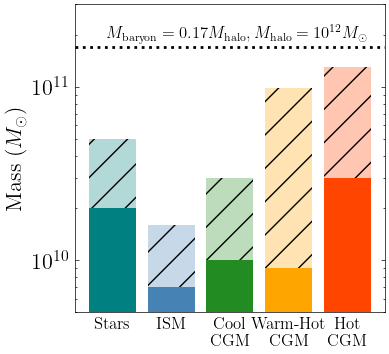

In [19]:
fig, ax = plt.subplots(1, figsize=(4,4))

a=.3

ax.bar(0, stars_lo, color='teal')
ax.bar(0, stars_hi, bottom=stars_lo, alpha=a, color='teal', hatch='/')

ax.bar(1, ism_lo, color='steelblue')
ax.bar(1, ism_hi, bottom=ism_lo, alpha=a, color='steelblue', hatch='/')

ax.bar(2, cool_lo, color='forestgreen')
ax.bar(2, cool_hi, bottom=cool_lo, alpha=a, color='forestgreen', hatch='/')

ax.bar(3, warm_lo, color='orange')
ax.bar(3, warm_hi, bottom=warm_lo, alpha=a, color='orange', hatch='/')

ax.bar(4, hot_lo, color='orangered')
ax.bar(4, hot_hi, bottom=hot_lo, alpha=a, color='orangered', hatch='/')

ax.text(-0.1, 1.9e11, r'$M_\mathrm{baryon} = 0.17 M_\mathrm{halo}, M_\mathrm{halo} = 10^{12} M_\odot$', fontsize=12)
ax.axhline(mb, linestyle=':', color='black', lw=2)

ax.set_yscale('log')

ax.set_ylabel(r'Mass ($M_\odot$)')

ax.set_ylim(5e9, 3e11)

ax.set_xticks([0,1,2,3,4], ['Stars', 'ISM', 'Cool \n CGM', 'Warm-Hot\n CGM', 'Hot \n CGM'], 
              fontsize=12, minor=False)
ax.xaxis.set_ticks_position('none') 

#ax.set_title('Uncertain baryon budget of the CGM', fontsize=15)

plt.savefig('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/Figures/Baryon_budget.pdf', dpi=300)
plt.savefig('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/Figures/Baryon_budget.png', dpi=300)

Plot of fractions

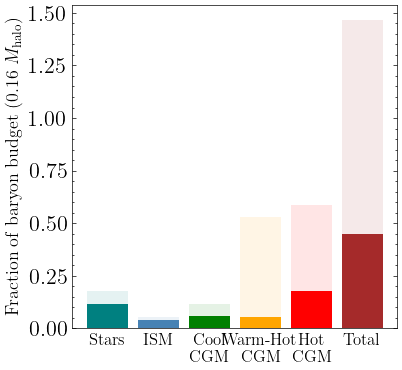

In [23]:
fig, ax = plt.subplots(1, figsize=(4.2,4.2))

ax.bar(0, stars_lo/mb, color='teal')
ax.bar(0, stars_hi/mb, alpha=.1, color='teal')

#ax.text(-0.4, 0.9, r'$M_\mathrm{halo} = 10^{12.2} M_\odot$', fontsize=14)

ax.bar(1, ism_lo/mb, color='steelblue')
ax.bar(1, ism_hi/mb, alpha=.1, color='steelblue')

ax.bar(2, cool_lo/mb, color='green')
ax.bar(2, cool_hi/mb, alpha=.1, color='green')

ax.bar(3, warm_lo/mb, color='orange')
ax.bar(3, warm_hi/mb, alpha=.1, color='orange')

ax.bar(4, hot_lo/mb, color='red')
ax.bar(4, hot_hi/mb, alpha=.1, color='red')

ax.bar(5, (stars_lo+ism_lo+cool_lo+warm_lo+hot_lo)/mb, color='brown')
ax.bar(5, (stars_hi+ism_hi+cool_hi+warm_hi+hot_hi)/mb, alpha=.1, color='brown')

ax.set_ylabel('Fraction of baryon budget (0.16 $M_\mathrm{halo}$)', fontsize=13)

ax.set_xticks([0,1,2,3,4,5], ['Stars', 'ISM', 'Cool \n CGM', 'Warm-Hot\n CGM', 'Hot \n CGM', 'Total'], 
              fontsize=12, minor=False)
ax.xaxis.set_ticks_position('none') 

Make phase diagram

In [24]:
from matplotlib.patches import Rectangle 

Text(0, 0.5, '$\\log(T/\\mathrm{K})$')

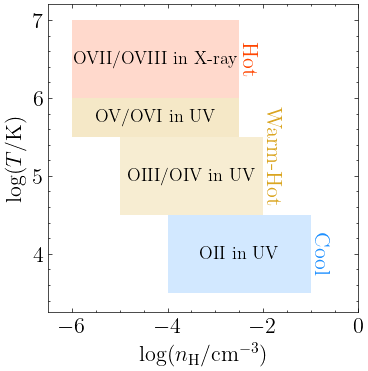

In [25]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.add_patch( Rectangle((-4, 3.5), 
                        3, 1, 
                        fc ='dodgerblue',
                        alpha=.2,
                        ec ='none', 
                        lw = 3) ) 

ax.text(-2.5,4, 'OII in UV', fontsize=13, horizontalalignment='center', verticalalignment='center')
ax.text(-1,4, 'Cool', color='dodgerblue', rotation=270, verticalalignment='center')


ax.add_patch( Rectangle((-5, 4.5), 
                        3, 1, 
                        alpha=.2,
                        fc ='goldenrod',  
                        ec ='none', 
                        lw = 3) ) 

ax.text(-3.5,5, 'OIII/OIV in UV', fontsize=13, horizontalalignment='center', verticalalignment='center')

ax.add_patch( Rectangle((-6, 5.5), 
                        3.5, 0.5, 
                        alpha=.25,
                        fc ='goldenrod',  
                        ec ='none', 
                        lw = 3) ) 

ax.text(-4.25,5.75, 'OV/OVI in UV', fontsize=13, horizontalalignment='center', verticalalignment='center')

ax.text(-2, 5.25, 'Warm-Hot', color='goldenrod', rotation=270, verticalalignment='center')

ax.add_patch( Rectangle((-6, 6), 
                        3.5, 1, 
                        fc ='orangered',  
                        ec ='none', 
                        alpha=.2,
                        lw = 3) ) 

ax.text(-4.25,6.5, 'OVII/OVIII in X-ray', fontsize=13, horizontalalignment='center', verticalalignment='center')
ax.text(-2.5,6.5, 'Hot', color='orangered', rotation=270, verticalalignment='center')

ax.set_xlim(-6.5, 0)
ax.set_ylim(3.25, 7.2)

ax.set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
ax.set_ylabel(r'$\log(T/\mathrm{K})$')

$$\log (n_\mathrm{H}/\mathrm{cm}^{-3})$$, $$\log (T/\mathrm{K})$$

In [26]:
1.02E+15/(3e13)

34.0